# Segunda Práctica Parte 1

Alejandro Jesús González Santana y Joaquín Ibáñez Peñalva

## Importación de librerías

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from functions_metrics import PSNR, SSIM, mae
import matplotlib.pyplot as plt

## Definición de red neuronal

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

mnist_data_valid = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
data_loader_valid = torch.utils.data.DataLoader(dataset=mnist_data_valid, batch_size=64, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
def add_gaussian_noise(img, noise_factor=0.3):
    noise = torch.randn_like(img) * noise_factor
    noisy_img = img + noise
    return noisy_img

## Entrenamiento de Red

In [18]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

num_epochs = 10
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.to(device)
        noisy_img = add_gaussian_noise(img, noise_factor=0.2).to(device)
        recon = model(noisy_img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')

## Evaluación de la red con nuevo datos

In [ ]:
model.eval()
total_mse = 0
num_samples = 0

for (img, labels) in data_loader_valid:
    img = img.to(device)
    labels = labels.to(device)
    
    with torch.no_grad():
        noisy_img = add_gaussian_noise(img, noise_factor=0.2).to(device)
        recon = model(noisy_img)
        
        mse = criterion(recon, img)
        total_mse += mse.item() * img.size(0)
        num_samples += img.size(0)
        
        psnr_value = PSNR(recon, img)
        recon_np = recon.cpu().numpy()
        img_np = img.cpu().numpy()
        mae_value = mae(recon, img)

        print(f'PSNR: {psnr_value:.4f}, MAE: {mae_value:.4f}')

average_mse = total_mse / num_samples


print(f'Average MSE: {average_mse:.4f}')

PSNR: 68.9055, MAE: 0.0321
PSNR: 68.6605, MAE: 0.0333
PSNR: 69.1713, MAE: 0.0305
PSNR: 69.1902, MAE: 0.0306
PSNR: 68.6450, MAE: 0.0334
PSNR: 68.5781, MAE: 0.0333
PSNR: 68.9756, MAE: 0.0316


PSNR: 68.9499, MAE: 0.0324
PSNR: 69.1060, MAE: 0.0313
PSNR: 69.2365, MAE: 0.0304
PSNR: 68.8948, MAE: 0.0322
PSNR: 69.1719, MAE: 0.0310
PSNR: 68.9887, MAE: 0.0321
PSNR: 68.8869, MAE: 0.0324
PSNR: 69.0355, MAE: 0.0314
PSNR: 69.0911, MAE: 0.0317
PSNR: 69.2222, MAE: 0.0305
PSNR: 68.7758, MAE: 0.0333
PSNR: 69.0692, MAE: 0.0317
PSNR: 69.2241, MAE: 0.0308
PSNR: 68.7221, MAE: 0.0332
PSNR: 68.9527, MAE: 0.0322
PSNR: 68.7742, MAE: 0.0329
PSNR: 68.8495, MAE: 0.0327
PSNR: 68.9388, MAE: 0.0318
PSNR: 68.6200, MAE: 0.0330
PSNR: 69.1471, MAE: 0.0310
PSNR: 69.1179, MAE: 0.0312
PSNR: 68.8619, MAE: 0.0318
PSNR: 68.8233, MAE: 0.0330
PSNR: 68.8049, MAE: 0.0324
PSNR: 68.8867, MAE: 0.0314
PSNR: 68.8991, MAE: 0.0318
PSNR: 68.8048, MAE: 0.0323
PSNR: 68.7691, MAE: 0.0334
PSNR: 68.4092, MAE: 0.0347
PSNR: 68.7350, MAE: 0.0326
PSNR: 68.4151, MAE: 0.0345
PSNR: 69.1635, MAE: 0.0306
PSNR: 68.9810, MAE: 0.0320
PSNR: 69.1267, MAE: 0.0309
PSNR: 69.3254, MAE: 0.0308
PSNR: 69.0682, MAE: 0.0318
PSNR: 68.7346, MAE: 0.0331
P

## Medidas para un conjunto de datos

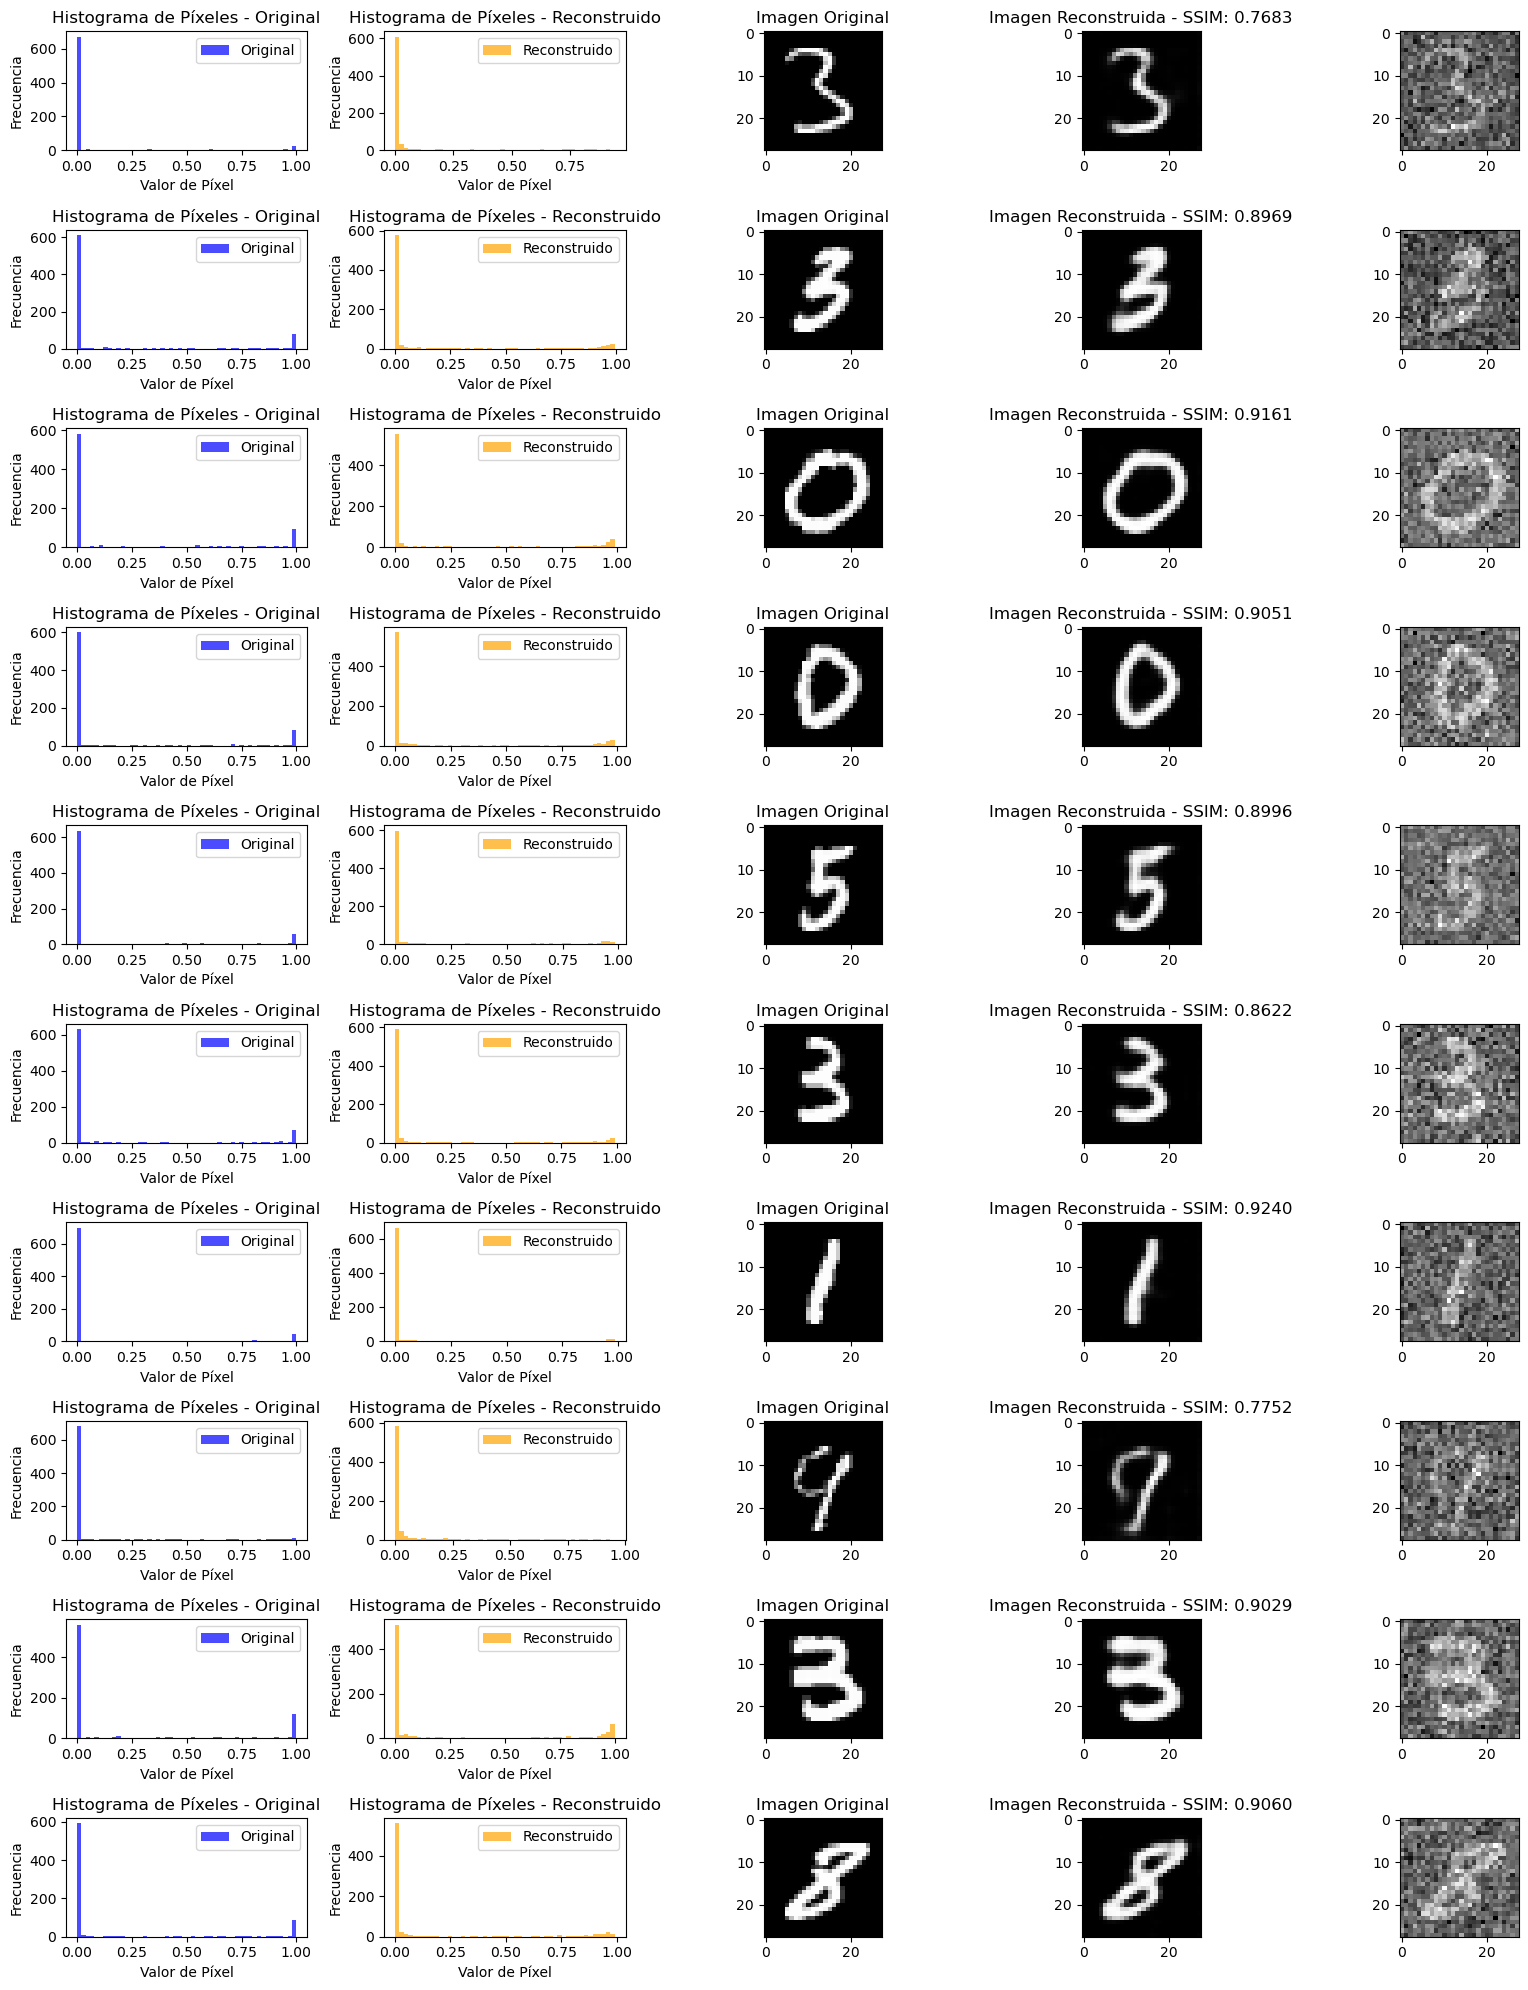

In [ ]:
model.eval()

dataiter = iter(data_loader_valid)
images, labels = next(dataiter)
images = images.to(device)

with torch.no_grad():
    noisy_img = add_gaussian_noise(images, noise_factor=0.2).to(device)
    reconstructions = model(noisy_img)

images_np = images.cpu().numpy()
images_noise_np = noisy_img.cpu().numpy()
reconstructions_np = reconstructions.cpu().numpy()


num_images = 10

fig, axes = plt.subplots(num_images, 5, figsize=(16, 2*num_images))

for i in range(num_images):
    original_gray = images_np[i].reshape(28, 28)
    reconstructed_gray = reconstructions_np[i].reshape(28, 28)
    ssim_index = SSIM(original_gray, reconstructed_gray)

    axes[i, 0].hist(original_gray.flatten(), bins=50, color='blue', alpha=0.7, label='Original')
    axes[i, 0].set_title('Histograma de Píxeles - Original')
    axes[i, 0].set_xlabel('Valor de Píxel')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].legend()

    axes[i, 1].hist(reconstructed_gray.flatten(), bins=50, color='orange', alpha=0.7, label='Reconstruido')
    axes[i, 1].set_title('Histograma de Píxeles - Reconstruido')
    axes[i, 1].set_xlabel('Valor de Píxel')
    axes[i, 1].set_ylabel('Frecuencia')
    axes[i, 1].legend()

    axes[i, 2].imshow(original_gray, cmap='gray')
    axes[i, 2].set_title('Imagen Original')

    axes[i, 3].imshow(reconstructed_gray, cmap='gray')
    axes[i, 3].set_title(f'Imagen Reconstruida - SSIM: {ssim_index:.4f}')

    noisy_gray = images_noise_np[i].reshape(28, 28)
    axes[i, 4].imshow(noisy_gray, cmap='gray')


plt.tight_layout()
plt.show()